In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as py
%matplotlib inline

In [177]:
train_data = py.read_csv('train.csv')
test_data = py.read_csv('test.csv')
#concatenate the test data and train data
data = py.concat([train_data.drop(['SalePrice'],axis=1),test_data],ignore_index=True)

In [178]:
#data.info()

In [179]:
data[( data['PoolQC'].isnull() == True ) & (data['PoolArea'] > 0 )]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2420,2421,20,RL,75.0,9532,Pave,NaN,Reg,Lvl,AllPub,...,0,368,NaN,GdPrv,NaN,0,2,2007,WD,Normal
2503,2504,50,RL,104.0,23920,Pave,NaN,Reg,Lvl,AllPub,...,0,444,NaN,NaN,NaN,0,4,2007,WD,Normal
2599,2600,20,RL,200.0,43500,Pave,NaN,Reg,Lvl,AllPub,...,0,561,NaN,GdPrv,NaN,0,6,2007,WD,Normal


In [180]:
data.loc[2420,'PoolQC'] = 'Ex'
data.loc[2503,'PoolQC'] = 'Ex'
data.loc[2599,'PoolQC'] = 'Fa'
data[( data['PoolQC'].isnull() == True ) & (data['PoolArea'] > 0 )]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [181]:
data.groupby(['PoolQC'])['PoolArea'].mean()

PoolQC
Ex    375.166667
Fa    576.000000
Gd    648.500000
Name: PoolArea, dtype: float64

In [182]:
data['Alley'] = data['Alley'].fillna('NA')         
data['PoolQC'] = data['PoolQC'].fillna('NA')
data['Fence'] = data['Fence'].fillna('NA')
data['MiscFeature'] = data['MiscFeature'].fillna('NA')
data['FireplaceQu'] = data['FireplaceQu'].fillna('NA')
data['Electrical'] = data['Electrical'].fillna('Sbrkr')

In [183]:
data[data['GarageYrBlt'].isnull() == True]
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['YearBuilt'])
data[data['GarageYrBlt'].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [184]:
data[data['GarageCars'].isnull() == True]
data.loc[2576,'GarageCars'] = 0
data.loc[2576,'GarageArea'] = 0

In [185]:
#data.iloc[2126]

In [186]:
data[(data['GarageFinish'].isnull() == True) & (data['GarageArea'] > 0)][['GarageArea','GarageFinish','GarageCars','GarageType','GarageQual','GarageCond']]

,GarageArea,GarageFinish,GarageCars,GarageType,GarageQual,GarageCond
2126,360.0,NaN,1.0,Detchd,NaN,NaN


In [187]:
#data.groupby(['GarageFinish','GarageCars','GarageType'])['GarageArea'].mean()

In [188]:
data.loc[2126,['GarageQual','GarageCond','GarageFinish']] = ['Gd','TA','RFn']

In [189]:
data['GarageType'] = data['GarageType'].fillna('NA')  
data['GarageQual']=data['GarageQual'].fillna('NA')
data['GarageCond']  = data['GarageCond'].fillna('NA')
data['GarageFinish'] = data['GarageFinish'].fillna('NA')
#data[data.isnull() == True].sum()

In [190]:
data[(data['MasVnrArea'].isnull() == False) & (data['MasVnrType'].isnull() == True)]['MasVnrArea']
data.loc[2610,'MasVnrType'] = 'BrkCmn'
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['MasVnrArea'] = data['MasVnrType'].fillna(0)
#data.groupby(['MasVnrType'])['MasVnrArea'].mean()
#data.loc[2610,'MasVnrType'] = 'BrkCmn'

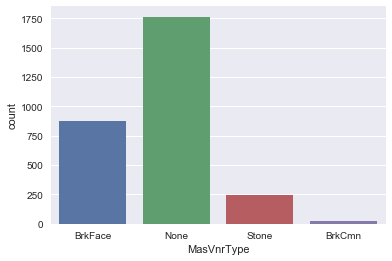

In [191]:
sns.countplot(data['MasVnrType'])

C:\Users\d062804\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


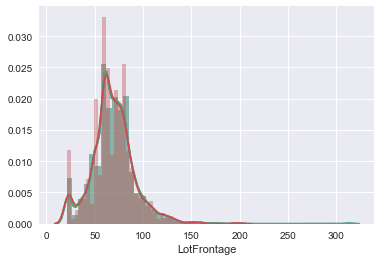

In [192]:
sns.distplot(data['LotFrontage'].dropna())
#data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
sns.distplot(data['LotFrontage'].dropna())
data.groupby(['Neighborhood'])['LotFrontage'].mean()
def processLotFrontage(x):
    if x['Neighborhood'] == 'Blmngtn':
        return 47.142857
    elif x['Neighborhood'] == 'Blueste':
        return 24.000000
    elif x['Neighborhood'] == 'BrDale':
        return 21.562500
    elif x['Neighborhood'] == 'BrkSide':
        return 57.509804
    elif x['Neighborhood'] == 'ClearCr':
        return 83.461538
    elif x['Neighborhood'] == 'CollgCr':
        return 71.682540
    elif x['Neighborhood'] == 'Crawfor':
        return 71.804878
    elif x['Neighborhood'] == 'Edwards':
        return 68.217391
    elif x['Neighborhood'] == 'Gilbert':
        return 79.877551
    elif x['Neighborhood'] == 'IDOTRR':
        return 62.500000
    elif x['Neighborhood'] == 'MeadowV':
        return 27.800000
    elif x['Neighborhood'] == 'Mitchel':
        return 70.083333
    elif x['Neighborhood'] == 'NAmes':
        return 76.462366
    elif x['Neighborhood'] == 'NPkVill':
        return 32.285714
    elif x['Neighborhood'] == 'NWAmes':
        return 81.288889
    elif x['Neighborhood'] == 'NoRidge':
        return 91.878788
    elif x['Neighborhood'] == 'NridgHt':
        return 81.881579
    elif x['Neighborhood'] == 'OldTown':
        return 62.788991
    elif x['Neighborhood'] == 'SWISU':
        return 58.913043
    elif x['Neighborhood'] == 'Sawyer':
        return 74.437500
    elif x['Neighborhood'] == 'SawyerW':
        return 71.500000
    elif x['Neighborhood'] == 'Somerst':
        return 64.666667
    elif x['Neighborhood'] == 'StoneBr':
        return 62.700000
    elif x['Neighborhood'] == 'Timber':
        return 80.133333
    elif x['Neighborhood'] == 'Veenker':
        return 59.714286
    
#data['LotFrontage'] = data.apply(lambda x : processLotFrontage(x) if np.isnan(x['LotFrontage']) else x['LotFrontage'],axis=1)
#sns.distplot(data['LotFrontage'])
sns.distplot(test_data['LotFrontage'].dropna())
#test_data['LotFrontage'] = test_data.apply(lambda x : processLotFrontage(x) if np.isnan(x['LotFrontage']) else x['LotFrontage'],axis=1)

#test_data[test_data['Exterior1st'].isnull() == True]
#test_data.groupby(['Exterior1st']).count()
#data.info()
lotFrontageByNeighborhood = data.groupby(['Neighborhood'])['LotFrontage'].mean()
import math

data['LotFrontage'] = data.apply(lambda row: lotFrontageByNeighborhood[row['Neighborhood']] if math.isnan(row['LotFrontage']) else row['LotFrontage'], axis=1)

In [193]:
#seems the whole test data has only AllPub as utilities so fill allPub for NA 
#data['Utilities'] = data['Utilities'].fillna('AllPub')
data.drop(['Utilities'],inplace=True,axis=1)

In [194]:
data['Exterior1st'] = data['Exterior1st'].fillna('VinylSd')
data['Exterior2nd'] = data['Exterior2nd'].fillna('VinylSd')
#test_data.info()

In [195]:
data[data['TotalBsmtSF'].isnull() == True][['BsmtFinType2','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure']]

,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure
2120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
data[(data['BsmtExposure'].isnull() == True) & (data['TotalBsmtSF'] > 0)][['BsmtFullBath','BsmtFullBath','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure']]

,BsmtFullBath,BsmtFullBath,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure
948,0.0,0.0,Unf,Unf,0.0,0.0,936.0,936.0,Gd,TA,NaN
1487,0.0,0.0,Unf,Unf,0.0,0.0,1595.0,1595.0,Gd,TA,NaN
2348,0.0,0.0,Unf,Unf,0.0,0.0,725.0,725.0,Gd,TA,NaN


In [197]:
data['BsmtUnfSF'] = data['BsmtUnfSF'].fillna(0)
data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(0)
data['BsmtFinSF1'] = data['BsmtFinSF1'].fillna(0)
data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(0)
data['BsmtFullBath'] = data['BsmtFullBath'].fillna(0)
data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(0)
data['BsmtFinType1'] = data.apply(lambda x : 'NA' if x['BsmtFinSF1'] == 0 else x['BsmtFinType1'],axis=1)
data['BsmtFinType2'] = data.apply(lambda x : 'NA' if x['BsmtFinSF2'] == 0 else x['BsmtFinType2'],axis=1)
data.loc[332,'BsmtFinType2'] = 'ALQ'
data['BsmtExposure'] = data.apply(lambda x : 'NO' if x['TotalBsmtSF'] > 0 or x['BsmtFinSF2'] > 0 or x['BsmtFinSF1'] > 0 or x['BsmtUnfSF'] > 0 else 'NA',axis=1)
data['BsmtCond'] = data.apply(lambda x : x['BsmtCond'] if x['TotalBsmtSF'] > 0 or x['BsmtFinSF2'] > 0 or x['BsmtFinSF1'] > 0 or x['BsmtUnfSF'] > 0 else 'NA',axis=1)
data['BsmtQual'] = data.apply(lambda x : x['BsmtQual'] if x['TotalBsmtSF'] > 0 or x['BsmtFinSF2'] > 0 or x['BsmtFinSF1'] > 0 or x['BsmtUnfSF'] > 0 else 'NA',axis=1)
data.loc[2040,'BsmtCond'] = 'Gd'
data.loc[2185,'BsmtCond'] = 'Gd'
data.loc[2524,'BsmtCond'] = 'Po'
data.loc[2217,'BsmtQual'] = 'Fa'
data.loc[2218,'BsmtQual'] =  'Fa'
#data['BsmtExposure'] = data.apply(lambda x : 'No' if x['BsmtUnfSF'])

In [198]:
data[(data['BsmtCond'].isnull() == True)][['TotalBsmtSF','BsmtFinSF2','BsmtFinSF1','BsmtUnfSF']]


,TotalBsmtSF,BsmtFinSF2,BsmtFinSF1,BsmtUnfSF


In [199]:
data[(data['BsmtQual'].isnull() == True)][['TotalBsmtSF','BsmtFinSF2','BsmtFinSF1','BsmtUnfSF']]

,TotalBsmtSF,BsmtFinSF2,BsmtFinSF1,BsmtUnfSF


In [200]:
data.groupby(['BsmtCond'])['TotalBsmtSF'].mean()

BsmtCond
Fa     848.500000
Gd    1138.048387
NA       0.000000
Po     969.500000
TA    1087.455104
Name: TotalBsmtSF, dtype: float64

In [201]:
data.groupby(['BsmtQual'])['TotalBsmtSF'].mean()

BsmtQual
Ex    1648.317829
Fa     709.788889
Gd    1120.267990
NA       0.000000
TA     955.211224
Name: TotalBsmtSF, dtype: float64

In [202]:
#kitchen quality
data[data['KitchenQual'].isnull() == True]
#sns.countplot(data['SalePrice'],hue = data['KitchenQual'])
data['KitchenQual'] = data['KitchenQual'].fillna('TA')

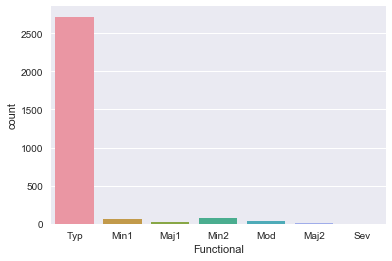

In [203]:
#functional
sns.countplot(data['Functional'])
data['Functional'] = data['Functional'].fillna('Typ')

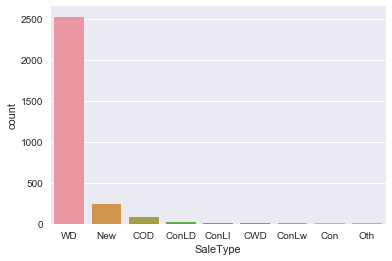

In [204]:
#sale Type
sns.countplot(data['SaleType'])
data[data['SaleType'].isnull() == True]
data['SaleType'] = data['SaleType'].fillna('WD')

In [205]:
#data.groupby(['Neighborhood'])['LotFrontage'].mean()

In [206]:
#data.info()
#sns.countplot(data['MSZoning'],hue = data['Neighborhood'])

data['GarageYrBlt'].dropna().hist()

In [207]:
#data['GarageYrBlt'].dropna().min()

In [208]:
#sns.countplot(x = data['SalePrice'],hue=data['MasVnrType'])

In [209]:
#sns.countplot(x = data['Neighborhood'],hue=data['MasVnrType'])

In [210]:
data[data['MSZoning'].isnull() == True]
data.loc[[1915,2250],'MSZoning'] = 'RM'
data.loc[[2216,2904],'MSZoning'] = 'RL'

In [211]:
#data.groupby(['MSSubClass'])['MSZoning'].value_counts()
data[data['MSZoning'].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


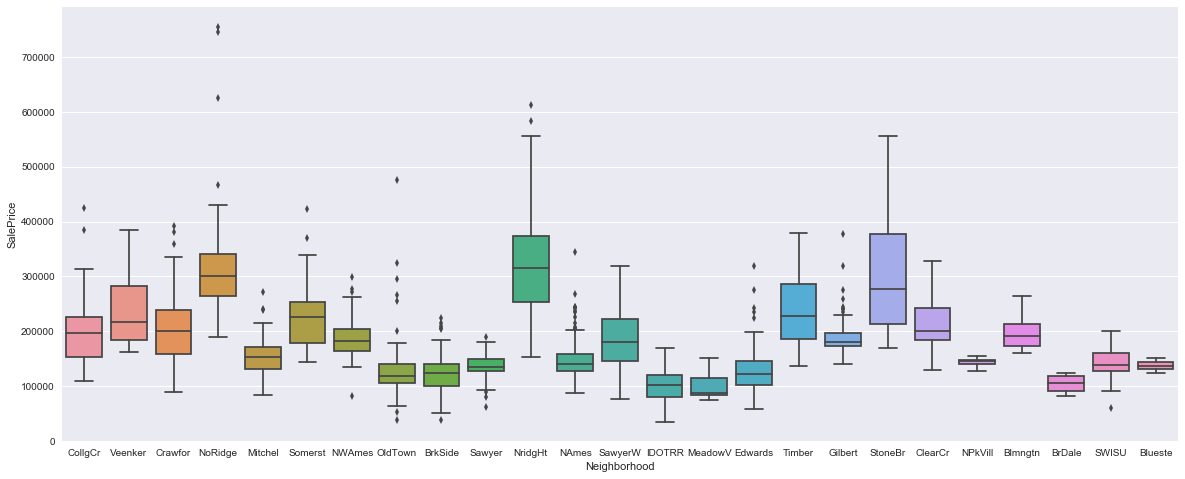

In [212]:
plt.figure(figsize=(20,8))
sns.boxplot(data['Neighborhood'],train_data['SalePrice'])
train_data['MeanSalePrice'] = train_data.groupby(['Neighborhood'])['SalePrice'].transform(np.mean)
#sns.barplot(neigbourSalePriceMean['Neighborhood'],neigbourSalePriceMean['SalePrice'])

In [213]:
neigbourSalePriceMean = py.DataFrame(train_data.groupby(['Neighborhood'])['SalePrice'].mean())
neigbourSalePriceMean.sort(['SalePrice'],inplace=True,ascending=False)
neigbourSalePriceMean.reset_index(inplace=True)


C:\Users\d062804\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [214]:
import jenkspy
neigbourSalePriceMeanBins = jenkspy.jenks_breaks(neigbourSalePriceMean['SalePrice'],nb_class=5)
neigbourSalePriceMean['SalePriceMapped'] = np.digitize(neigbourSalePriceMean['SalePrice'],neigbourSalePriceMeanBins)
def NeighbourhoodMap(x):
    return (neigbourSalePriceMean['SalePriceMapped'][neigbourSalePriceMean['Neighborhood'] == x].iloc[0])
#data['Neighborhood'] = data['Neighborhood'].apply(lambda x: NeighbourhoodMap(x))

In [215]:
neigbourSalePriceMeanBins

[98576.0, 104493.0, 156270.0, 212565.0, 242247.0, 335295.0]

In [216]:
neigbourSalePriceMean['SalePriceMapped'][neigbourSalePriceMean['Neighborhood'] == 'StoneBr'].iloc[0]

5

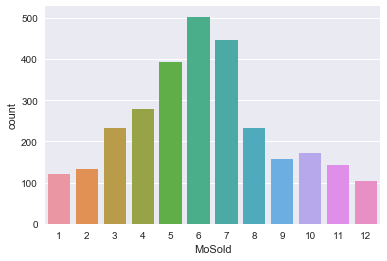

In [217]:
data['HouseAge'] = 2010 - data['YearBuilt']
sns.countplot(data['MoSold'])
data['HighSeason'] = data['MoSold'].apply(lambda x : 1 if x == 5 or x == 6 or x == 7 else 0)

In [218]:
data['Neighborhood']

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
5       Mitchel
6       Somerst
7        NWAmes
8       OldTown
9       BrkSide
10       Sawyer
11      NridgHt
12       Sawyer
13      CollgCr
14        NAmes
15      BrkSide
16        NAmes
17       Sawyer
18      SawyerW
19        NAmes
20      NridgHt
21       IDOTRR
22      CollgCr
23      MeadowV
24       Sawyer
25      NridgHt
26        NAmes
27      NridgHt
28        NAmes
29      BrkSide
         ...   
2889     IDOTRR
2890     IDOTRR
2891     IDOTRR
2892     IDOTRR
2893     IDOTRR
2894    Crawfor
2895    Crawfor
2896    Mitchel
2897    Mitchel
2898    Mitchel
2899    Mitchel
2900     Timber
2901     Timber
2902     Timber
2903     Timber
2904    Mitchel
2905    Mitchel
2906    MeadowV
2907    Mitchel
2908    Mitchel
2909    MeadowV
2910    MeadowV
2911    Mitchel
2912    MeadowV
2913    MeadowV
2914    MeadowV
2915    MeadowV
2916    Mitchel
2917    Mitchel
2918    Mitchel
Name: Neighborhood, dtyp

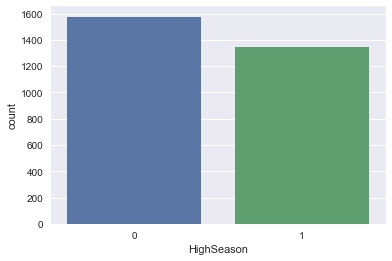

In [219]:
sns.countplot(data['HighSeason'])

In [220]:
areacols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
             'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
             'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea']
data['TotalArea'] = data[areacols].sum(axis=1)
data['TotalArea'].head()

0    14256.0
1    15486.0
2    17380.0
3    15505.0
4    22142.0
Name: TotalArea, dtype: float64

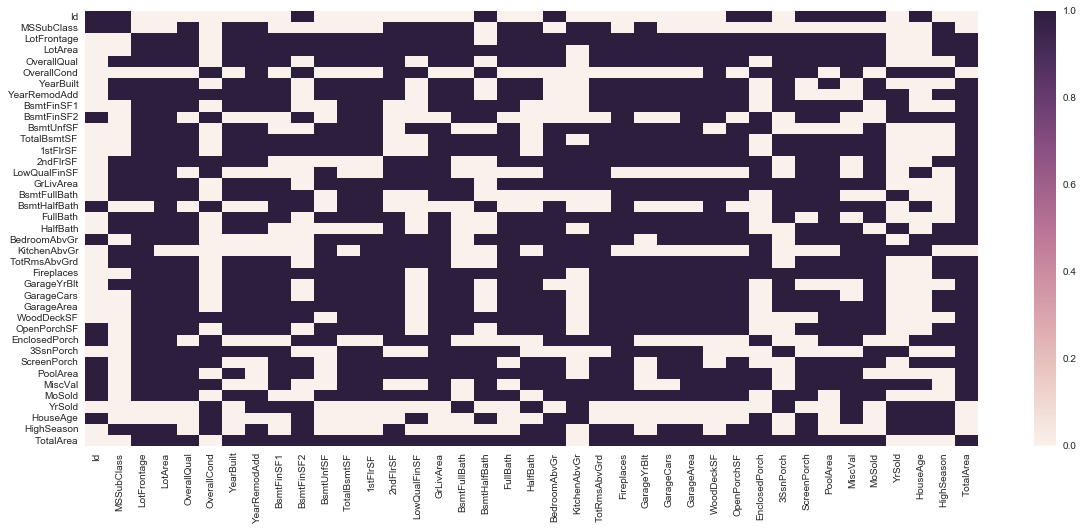

In [221]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr()> 0)

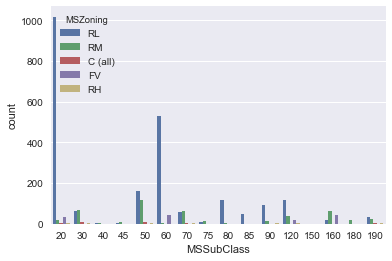

In [222]:
sns.countplot(data['MSSubClass'],hue=data['MSZoning'])

In [223]:
#data.info()

In [224]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

In [225]:
#data['SalePrice'].hist()

In [226]:
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])

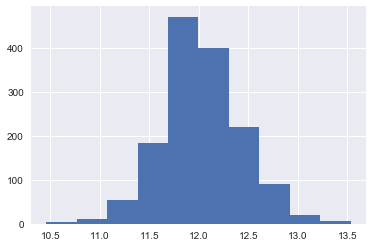

In [227]:
train_data['SalePrice'].hist()

In [228]:
#train_data.drop(['SalePrice'],axis=1)

In [229]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MeanSalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699,197965
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016,238772
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171,197965
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405,210624
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220,335295


In [230]:
#train_data.info()

In [231]:
#replace Overall quality by few parameters
map_overall_quality = {1:1,2:1,3:1,4:2,5:2,6:2,7:3,8:3,9:3,10:3}
data['OverallCond'] = data['OverallCond'].map(map_overall_quality)
data['OverallQual'] = data['OverallQual'].map(map_overall_quality)
#data['OverallQualCoded'].hist()
#data['OverallCond'] = data['OverallCondCoded']
#data['OverallQual'] = data['OverallQualCoded']
#map test DATA AS WELL
#test_data['OverallCond'] = test_data['OverallCond'].map(map_overall_quality)
#test_data['OverallCond']
#data['OverallCond']

In [232]:
#test_data['OverallQual'] = test_data['OverallQual'].map(map_overall_quality)
#test_data['OverallQual']

In [233]:
#map the quality codes to numeric values
map_quality_codes = {"Ex" : 0, "Gd" :1 , "TA" :2 ,"Fa" :3 ,"Po" :4 ,"NA" : 5}
data['HeatingQC'] = data['HeatingQC'].map(map_quality_codes)
data['ExterQual'] = data['ExterQual'].map(map_quality_codes)
data['ExterCond'] = data['ExterCond'].map(map_quality_codes)
data['BsmtCond'] = data['BsmtCond'].map(map_quality_codes)
data['BsmtQual'] = data['BsmtQual'].map(map_quality_codes)
data['KitchenQual'] = data['KitchenQual'].map(map_quality_codes)
data['FireplaceQu'] = data['FireplaceQu'].map(map_quality_codes)
data['GarageQual'] = data['GarageQual'].map(map_quality_codes)
data['GarageCond'] = data['GarageCond'].map(map_quality_codes)
data['PoolQC'] = data['PoolQC'].map(map_quality_codes)
#map test data also

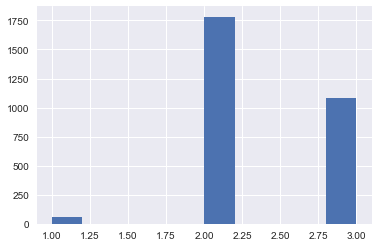

In [234]:
data['OverallQual'].hist()

In [235]:
#Adding new features
data['NewHouse'] = (data['YearBuilt'] == data['YearRemodAdd']) * 1

In [236]:
numeric_colums = data.dtypes[data.dtypes != object].index

In [237]:
skew_colums = data[numeric_colums].apply(lambda x : x.skew())

In [238]:
#skew_colums.sort_values(ascending=False)

In [239]:
#skew_colums = test_data[numeric_colums].apply(lambda x : x.skew())
#skew_colums.sort_values(ascending=False)

In [240]:
skew_colums = skew_colums[skew_colums > 0.75]

In [241]:
skew_colums.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'BsmtQual',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'TotalArea'],
      dtype='object')

In [242]:
data[skew_colums.index] = data[skew_colums.index].apply(lambda x: np.log1p(x))
#test_data[skew_colums.index] = test_data[skew_colums.index].apply(lambda x: np.log1p(x))


In [243]:
results = data[skew_colums.index].apply(lambda x : x.skew())

In [244]:
objct_colums = data.dtypes[data.dtypes == object]

In [245]:
object_column_dummies = py.get_dummies(data[objct_colums.index],drop_first=True)
#object_column_dummies_test_data = py.get_dummies(test_data[objct_colums.index],drop_first=True)

In [246]:
object_column_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 182 entries, MSZoning_FV to SaleCondition_Partial
dtypes: uint8(182)
memory usage: 518.9 KB


In [247]:
object_column_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 182 entries, MSZoning_FV to SaleCondition_Partial
dtypes: uint8(182)
memory usage: 518.9 KB


In [248]:
data = py.concat([data,object_column_dummies],axis=1)
#test_data =  py.concat([test_data,object_column_dummies_test_data],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 265 entries, Id to SaleCondition_Partial
dtypes: float64(31), int32(1), int64(18), object(33), uint8(182)
memory usage: 2.3+ MB


In [249]:
data.drop(objct_colums.index,inplace=True,axis=1)
#test_data.drop(objct_colums.index,inplace=True,axis=1)

In [250]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,4.110874,4.189655,9.042040,3,1.098612,2003,2003,1,2,...,0,0,0,0,1,0,0,0,1,0
1,2,3.044522,4.394449,9.169623,2,1.386294,1976,1976,2,2,...,0,0,0,0,1,0,0,0,1,0
2,3,4.110874,4.234107,9.328212,3,1.098612,2001,2002,1,2,...,0,0,0,0,1,0,0,0,1,0
3,4,4.262680,4.110874,9.164401,3,1.098612,1915,1970,2,2,...,0,0,0,0,1,0,0,0,0,0
4,5,4.110874,4.442651,9.565284,3,1.098612,2000,2000,1,2,...,0,0,0,0,1,0,0,0,1,0


In [251]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#data = scaler.fit_transform(data)

In [252]:
combinedData= data
test_data = combinedData[1460:]
#test_data.reset_index(inplace=True)
test_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,1461,3.044522,4.394449,9.360741,2,1.098612,1961,1961,2,2,...,0,0,0,0,1,0,0,0,1,0
1461,1462,3.044522,4.406719,9.565775,2,1.098612,1958,1958,2,2,...,0,0,0,0,1,0,0,0,1,0
1462,1463,4.110874,4.317488,9.534668,2,1.098612,1997,1998,2,2,...,0,0,0,0,1,0,0,0,1,0
1463,1464,4.110874,4.369448,9.208238,2,1.098612,1998,1998,2,2,...,0,0,0,0,1,0,0,0,1,0
1464,1465,4.795791,3.784190,8.518392,3,1.098612,1992,1992,1,2,...,0,0,0,0,1,0,0,0,1,0


In [253]:
train_data['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
          ...    
1430    12.165985
1431    11.875838
1432    11.074436
1433    12.136192
1434    11.982935
1435    12.066816
1436    11.699413
1437    12.885673
1438    11.916395
1439    12.190964
1440    12.160034
1441    11.913720
1442    12.644331
1443    11.703554
1444    12.098493
1445    11.767575
1446    11.969724
1447    12.388398
1448    11.626263
1449    11.429555
1450    11.820418
1451    12.567555
1452    11.884496
1453    11.344519
1454    12

In [254]:
data = py.concat([data[0:1460],train_data['SalePrice']],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 233 entries, Id to SalePrice
dtypes: float64(32), int32(1), int64(18), uint8(182)
memory usage: 835.6 KB


In [255]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,4.110874,4.189655,9.042040,3,1.098612,2003,2003,1,2,...,0,0,0,1,0,0,0,1,0,12.247699
1,2,3.044522,4.394449,9.169623,2,1.386294,1976,1976,2,2,...,0,0,0,1,0,0,0,1,0,12.109016
2,3,4.110874,4.234107,9.328212,3,1.098612,2001,2002,1,2,...,0,0,0,1,0,0,0,1,0,12.317171
3,4,4.262680,4.110874,9.164401,3,1.098612,1915,1970,2,2,...,0,0,0,1,0,0,0,0,0,11.849405
4,5,4.110874,4.442651,9.565284,3,1.098612,2000,2000,1,2,...,0,0,0,1,0,0,0,1,0,12.429220


In [256]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report

In [257]:
linearReg = LinearRegression()

In [258]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['SalePrice'],axis =1), data['SalePrice'], test_size=0.33, random_state=42)

In [259]:
linearReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [260]:
pred_test = linearReg.predict(X_test)

In [261]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

MAE: 0.0938796818118
MSE: 0.0236742825519
RMSE: 0.153864494124


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 233 entries, Id to SalePrice
dtypes: float64(32), int32(1), int64(18), uint8(182)
memory usage: 835.6 KB


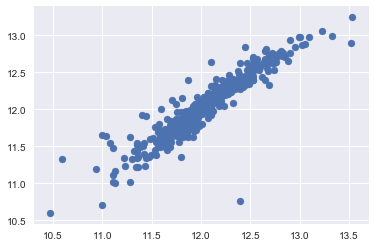

In [262]:
plt.scatter(y_test,pred_test)
data.info()

In [263]:
#Randome forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import StratifiedKFold
forest = RandomForestRegressor()
parameters = {'max_depth' : [4,5,6,7,8],
              'n_estimators': [200,300,10]}
from sklearn.grid_search import GridSearchCV
#cross_validation = StratifiedKFold( n_folds=5)
grid_search_randomForest = GridSearchCV(forest,parameters,cv=5)
#grid_search_randomForest.fit(data.drop(['SalePrice'],axis=1), data['SalePrice'])
#grid_search_randomForest.best_score_

In [264]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,4.110874,4.189655,9.042040,3,1.098612,2003,2003,1,2,...,0,0,0,1,0,0,0,1,0,12.247699
1,2,3.044522,4.394449,9.169623,2,1.386294,1976,1976,2,2,...,0,0,0,1,0,0,0,1,0,12.109016
2,3,4.110874,4.234107,9.328212,3,1.098612,2001,2002,1,2,...,0,0,0,1,0,0,0,1,0,12.317171
3,4,4.262680,4.110874,9.164401,3,1.098612,1915,1970,2,2,...,0,0,0,1,0,0,0,0,0,11.849405
4,5,4.110874,4.442651,9.565284,3,1.098612,2000,2000,1,2,...,0,0,0,1,0,0,0,1,0,12.429220


In [265]:
#try Lazzo now
from sklearn import linear_model
lazzo = linear_model.Lasso(max_iter = 3000)
parameters = {'alpha' : [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5]}
#cross_validation = StratifiedKFold(data['SalePrice'],n_folds=2)
grid_searchLazzo = GridSearchCV(lazzo,parameters,cv=2)
#grid_searchLazzo.fit(data.drop(['SalePrice'],axis=1), data['SalePrice'])
#print(grid_searchLazzo.best_estimator_)
#print(grid_searchLazzo.best_params_)
#print(grid_searchLazzo.best_score_)

In [266]:
#try Ridge
from sklearn import linear_model
#cross_validation = StratifiedKFold(data['SalePrice'],n_folds=2)
ridge = linear_model.Ridge(max_iter=3000)
parameters = {'alpha' : [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5]}
grid_searchRidgeCv = GridSearchCV(ridge,parameters,cv=2)
#grid_searchRidgeCv.fit(data.drop(['SalePrice'],axis=1), data['SalePrice'])
#grid_searchRidgeCv.best_score_

In [267]:
#do feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor

In [268]:
extreg = ExtraTreesRegressor()
selectModel = SelectFromModel(extreg)
#selectModel = selectModel.fit(data.drop(['SalePrice'],axis=1),data['SalePrice'])
#fittedModel = selectModel.transform(data.drop(['SalePrice'],axis=1))

In [269]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,4.110874,4.189655,9.042040,3,1.098612,2003,2003,1,2,...,0,0,0,1,0,0,0,1,0,12.247699
1,2,3.044522,4.394449,9.169623,2,1.386294,1976,1976,2,2,...,0,0,0,1,0,0,0,1,0,12.109016
2,3,4.110874,4.234107,9.328212,3,1.098612,2001,2002,1,2,...,0,0,0,1,0,0,0,1,0,12.317171
3,4,4.262680,4.110874,9.164401,3,1.098612,1915,1970,2,2,...,0,0,0,1,0,0,0,0,0,11.849405
4,5,4.110874,4.442651,9.565284,3,1.098612,2000,2000,1,2,...,0,0,0,1,0,0,0,1,0,12.429220


In [270]:
from sklearn.decomposition import PCA
pca = PCA()
from sklearn.pipeline import Pipeline
from sklearn import cross_validation
X = data.drop(['SalePrice'],axis=1)
y=data['SalePrice']

In [271]:
pipelineRandomForest = Pipeline([('scale',StandardScaler()),('pca',pca),('randomForest',grid_search_randomForest)])
pipelineRandomForest.fit(X,y)

predictRandomForest = pipelineRandomForest.predict(test_data)
predictRandomForestin = np.expm1(predictRandomForest)
predictRandomForestdf = py.DataFrame(predictRandomForestin,columns=['SalePrice'],index=test_data['Id'])
#testResultRandomForest = py.concat([test_data['Id'],predictRandomForestdf],axis=1)
#predictRandomForestdf.to_csv('TestResultandomForest.csv',index=False,columns=['Id','SalePrice'])
#cross_validation.cross_val_score(pipelineRandomForest,X,y)

In [272]:
predictRandomForestdf.to_csv('TestResultandomForest.csv')

In [273]:
#py.concat([predictRandomForestdf['Id'],predictRandomForestdf['SalePrice']],axis=1)

In [274]:
test_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,1461,3.044522,4.394449,9.360741,2,1.098612,1961,1961,2,2,...,0,0,0,0,1,0,0,0,1,0
1461,1462,3.044522,4.406719,9.565775,2,1.098612,1958,1958,2,2,...,0,0,0,0,1,0,0,0,1,0
1462,1463,4.110874,4.317488,9.534668,2,1.098612,1997,1998,2,2,...,0,0,0,0,1,0,0,0,1,0
1463,1464,4.110874,4.369448,9.208238,2,1.098612,1998,1998,2,2,...,0,0,0,0,1,0,0,0,1,0
1464,1465,4.795791,3.784190,8.518392,3,1.098612,1992,1992,1,2,...,0,0,0,0,1,0,0,0,1,0


In [275]:
from sklearn.decomposition import PCA
pca = PCA()

In [276]:
#pipeline using ridge

pipelineRidge = Pipeline([('scale',StandardScaler()),('pca',pca),('ridge',grid_searchRidgeCv)])
pipelineRidge.fit(X,y)

predictRidge = pipelineRidge.predict(test_data)
predictRidgein = np.expm1(predictRidge)
predictRidgedf = py.DataFrame(predictRidgein,columns=['SalePrice'],index=test_data['Id'])
#testResultRidge = py.concat([test_data['Id'],predictRidgedf],axis=1)
predictRidgedf.to_csv('TestRidge.csv')
#cross_validation.cross_val_score(pipelineRidge,X,y)

In [277]:
#pipeline usinglazzo
pipelineLazzo = Pipeline([('scale',StandardScaler()),('pca',pca),('lazzo',grid_searchLazzo)])
pipelineLazzo.fit(X,y)

predictLazzo = pipelineLazzo.predict(test_data)
predictLazzoin = np.expm1(predictLazzo)
predictLazzodf = py.DataFrame(predictLazzoin,columns=['SalePrice'],index=test_data['Id'])
#testResultLazzo = py.concat([test_data['Id'],predictLazzodf],axis=1)
predictLazzodf.to_csv('TestLazzo.csv')
#cross_validation.cross_val_score(pipelineLazzo,X,y)

In [278]:
averagePreditresult = 0.50 * predictLazzodf + 0.5 * predictRidgedf
#averagePreditresult = py.concat([test_data['Id'],averagePreditresult],axis=1)
averagePreditresult.to_csv('AverageHouse.csv')

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
gradientboost = GradientBoostingRegressor()
adaboost = AdaBoostRegressor(grid_search_randomForest)

In [ ]:
parameters = {'alpha' : [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5]}
grid_searchgradientboostCv = GridSearchCV(gradientboost,parameters,cv=2)
#grid_searchgradientboostCv.fit(data.drop(['SalePrice'],axis=1), data['SalePrice'])
#grid_searchgradientboostCv.best_score_
#pipeline using ridge
pipelineGB = Pipeline([('pca',pca),('gb',grid_searchgradientboostCv)])
pipelineGB.fit(X,y)

pipelineGB = pipelineGB.predict(test_data)
predictGBin = np.expm1(pipelineGB)
predictGBdf = py.DataFrame(predictGBin,columns=['SalePrice'],index=test_data['Id'])
#testResultGB = py.concat([test_data['Id'],predictGBdf],axis=1)
predictGBdf.to_csv('TestGB.csv')
#cross_validation.cross_val_score(pipelineGB,X,y)

In [ ]:
pipelineada = Pipeline([('pca',pca),('ada',adaboost)])
pipelineada.fit(X,y)

predictada = pipelineada.predict(test_data)
predictadain = np.expm1(predictada)
predictadadf = py.DataFrame(predictadain,columns=['SalePrice'],index=test_data['Id'])
#testResultada = py.concat([test_data['Id'],predictadadf],axis=1)
predictadadf.to_csv('TestADA.csv')